# CS 224n Assignment #2: word2vec
## Understanding word2vec

Let’s have a quick refresher on the word2vec algorithm. The key insight behind word2vec is that ‘a word is known by the company it keeps’. Concretely, suppose we have a ‘center’ word c and a contextual window surrounding c. We shall refer to words that lie in this contextual window as ‘outside words’. For example, in Figure 1 we see that the center word c is ‘banking’. Since the context window size is 2, the outside words are ‘turning’, ‘into’, ‘crises’, and ‘as’.
The goal of the skip-gram word2vec algorithm is to accurately learn the probability distribution $P(O|C)$. Given a specific word $o$ and a specific word $c$, we want to calculate $P (O = o|C = c)$, which is the probability that word $o$ is an ‘outside’ word for $c$, i.e., the probability that $o$ falls within the contextual window of $c$.

<img src="https://drive.google.com/uc?export=view&id=1LUqUw8b5qXaN9iCLAjYZ_GHRJ4uDM6tH" />

In word2vec, the conditional probability distribution is given by taking vector dot-products and applying the softmax function:

\begin{equation*}
P(O = o | C = c) = \frac{\exp(u_o^t v_c)}{\sum_\limits{w \in Vocab} \exp(u_w^tv_c)}
\tag{1}
\end{equation*}

Here, $u_o$ is the ‘outside’ vector representing outside word $o$, and $v_c$ is the ‘center’ vector representing center word $c$. To contain these parameters, we have two matrices, $U$ and $V$ . The columns of $U$ are all the ‘outside’
vectors $u_w$. The columns of $V$ are all of the ‘center’ vectors $v_w$. Both $U$ and $V$ contain a vector for every $w \in$ Vocabulary$^{1}$<a id='note1'></a>.

Recall from lectures that, for a single pair of words c and o, the loss is given by:
\begin{equation*} 
J_{naive-softmax}(v_c,o,U) = −\log P(O = o|C = c).
\tag{2}
\end{equation*} 
Another way to view this loss is as the cross-entropy$^{2}$<a id='note2'></a> between the true distribution $y$ and the predicted distribution $\hat{y}$. Here, both $y$ and $\hat{y}$ are vectors with length equal to the number of words in the vocabulary. Furthermore, the $k^{th}$ entry in these vectors indicates the conditional probability of the $k^{th}$ word being an ‘outside word’ for the given $c$. The true empirical distribution $y$ is a one-hot vector with a $1$ for the true outside word $o$, and $0$ everywhere else. The predicted distribution $\hat{y}$ is the probability distribution $P (O|C = c)$ given by our model in equation $\eqref{eq:eq1}$.

Notes:

* [1](#note1) Assume that every word in our vocabulary is matched to an integer number $k$. Bolded lowercase letters represent vectors. $u_k$ is both the $k^th$ column of $U$ and the ‘outside’ word vector for the word indexed by $k$. $v_k$ is both the $k^th$ column of V and the ‘center’ word vector for the word indexed by $k$. In order to simplify notation we shall interchangeably use $k$ to refer to the word and the index-of-the-word.
* [2](#note2) The Cross Entropy Loss between the true (discrete) probability distribution p and another distribution $q$ is $−\sum_{􏰀i} p_i \log(q_i)$.


### (a)

\begin{equation}
- \sum\limits_{w \in {Vocab}} y_w \log(\hat{y}_w) = - \sum\limits_{w \in {Vocab}} \mathbb{1}_{w = o} \log(\hat{y}_w) = - \log (\hat{y}_o)
\tag{3}
\end{equation}

### (b)
Remembering that:

\begin{equation}
u_w = \delta_w U^t \text{ and } y = \delta_o
\tag{3.b.1}
\end{equation}
\begin{equation}
\frac{\partial}{\partial v}\left(\exp(u^tv)\right) = u \cdot \exp(u^tv)
\tag{3.b.2}
\end{equation}
\begin{equation}
\frac{d}{d v}\log(f(v)) = \frac{1}{f(v)} \frac{df}{dv}(v)
\tag{3.b.3}
\end{equation}

If $s_j = \frac{e^{x_j}}{\sum_\limits{k} e^{x_k}}$, then: 
\begin{equation}
\frac{\partial s_j}{\partial x_i} =
  \begin{cases}
    s_j(1-s_j) & \text{if $i = j$} \\
    -s_is_j & \text{otherwise}
  \end{cases}
\tag{3.b.4}
\end{equation}

Then, from \ref{eq:eq1} and \ref{eq:eq2}, the chain-rule, then writing $x_w^c = u_w^tv_c$ : 

\begin{equation}
\frac{\partial}{\partial v_c} J_{naive-softmax} = - \frac{\partial}{\partial v_c} \log \left( \hat{y}_o \right) = − \frac{1}{s_o^c} \frac{\partial \hat{y}_o} {\partial v_c} = − \frac{1}{\hat{y}_o} \sum\limits_{w \in Vocab} \frac{\partial x_w^c}{\partial v_c} \frac{\partial \hat{y}_o}{\partial x_w^c}
\end{equation}
\begin{equation}
\frac{\partial}{\partial v_c} J_{naive-softmax} = − \frac{1}{\hat{y}_o} \left( - \sum\limits_{\substack w \in Vocab \\ w \neq o} u_w^t \hat{y}_o \hat{y}_w  + u_o^t \hat{y}_o(1-\hat{y}_o) \right) = - u_o^t + \sum\limits_{w \in Vocab} \hat{y}_w u_w^t = -\delta_o U^t + \left(\sum\limits_{w \in Vocab} \hat{y}_w  \delta_w\right) U^t
\tag{3.b.5}
\end{equation}
Finally:
\begin{equation}
\frac{\partial}{\partial v_c} J_{naive-softmax} = U^t (\hat{y}-y)
\tag{3.b}
\end{equation}

### c

Adapting $\ref{eq:eq3.b}$:

\begin{equation}
\frac{\partial}{\partial u_w} J_{naive-softmax} = − \frac{1}{\hat{y}_o} \sum\limits_{w' \in Vocab} \frac{\partial x_{w'}^c}{\partial u_w} \frac{\partial \hat{y}_o}{\partial x_{w'}^c}
\end{equation}

\begin{equation}
\frac{\partial x_{w'}^c}{\partial u_w} = \frac{\partial (u_{w'}^tv_c)}{\partial u_w} = 
  \begin{cases}
    0 & \text{if $w \neq w'$}\\ 
    v_c & \text{otherwise}
  \end{cases}
\end{equation}

Then:
\begin{equation}
\frac{\partial}{\partial u_w} J_{naive-softmax} = − \frac{1}{\hat{y}_o} v_c \frac{\partial \hat{y}_o}{\partial x_w^c} =
  \begin{cases}
    − \frac{1}{\hat{y}_o} v_c \hat{y}_o (1 - \hat{y}_o) & = (\hat{y}_o - 1) v_c & = (\hat{y}_o - y_o) v_c & \text{if $w = o$}\\ 
    \frac{1}{\hat{y}_o} v_c \hat{y}_o \hat{y}_w & = \hat{y}_w v_c & = (\hat{y}_w - y_w) v_c & \text{otherwise}
  \end{cases}
\end{equation}
\begin{equation}
\frac{\partial}{\partial u_w} J_{naive-softmax} = (\hat{y} - y)v_c^t
\tag{3.c}
\end{equation}

### d

The sigmoid function is given by:
\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1}
\tag{4}
\end{equation}

Then, the derivative of the sigmoid function with respect to the scalar $x$ is given by:
\begin{equation}
\frac{d\sigma}{dx} = - \frac{-e^{-x}}{{\left(1 + e^{-x}\right)}^2} = \frac{1 +e^{-x} - 1}{{\left(1 + e^{-x}\right)}^2} = \sigma(x)(1 - \sigma(x))
\tag{4.d}
\end{equation}

### e
Now we shall consider the Negative Sampling loss, which is an alternative to the Naive Softmax loss. Assume that K negative samples (words) are drawn from the vocabulary. For simplicity of notation we shall refer to them as $w_1,w_2,\dots,w_K$ and their outside vectors as $u_1,\dots,u_K$. Note that $o \notin \left\{w_1,\dots,w_K\right\}$. For a center word $c$ and an outside word $o$, the negative sampling loss function is given by:
\begin{equation}
J_{neg-sample}(v_c,o,U) = − \log\left(\sigma(u_o^t v_c)\right) − \sum\limits_{k=1}^{K}
\log\left(\sigma(−u_k^t v_c)\right)
\tag{5}
\end{equation}

####(i)
\begin{equation}
\frac{\partial}{\partial v_c} J_{neg-sample}(v_c,o,U) = -\frac{1}{\sigma(x_o^c)} \frac{\partial x_o^c}{\partial v_c} \frac{d \sigma}{d x}(x_o^c) - \sum\limits_{k=1}^{K} \frac{1}{\sigma(-x_k^c)} \left(-\frac{\partial x_k^c}{\partial v_c} \frac{d \sigma}{d x}(-x_k^c)\right) = -(1 - \sigma(x_o^c)) u_o^t + \sum\limits_{k=1}^{K} (1 - \sigma(-x_k^c)) u_k^t
\end{equation}
\begin{equation}
\frac{\partial}{\partial v_c} J_{neg-sample}(v_c,o,U) = -(1 - \sigma(u_o^t v_c)) u_o^t + \sum\limits_{k=1}^{K} (1 - \sigma(-u_k^t v_c)) u_k^t
\tag{5.1}
\end{equation}
####(ii)
\begin{equation}
\frac{\partial}{\partial u_o} J_{neg-sample}(v_c,o,U) = -\frac{1}{\sigma(x_o^c)} \frac{\partial x_o^c}{\partial u_o} \frac{d \sigma}{d x}(x_o^c) - \sum\limits_{k=1}^{K} \frac{1}{\sigma(-x_k^c)} \left(-\frac{\partial x_k^c}{\partial u_o} \frac{d \sigma}{d x}(-x_k^c)\right) = -(1 - \sigma(u_o^t v_c)) v_c
\tag{5.2}
\end{equation}
####(iii)
\begin{equation}
\frac{\partial}{\partial u_k} J_{neg-sample}(v_c,o,U) = -\frac{1}{\sigma(x_o^c)} \frac{\partial x_o^c}{\partial u_k} \frac{d \sigma}{d x}(x_o^c) - \sum\limits_{k'=1}^{K} \frac{1}{\sigma(-x_{k'}^c)} \left(-\frac{\partial x_{k'}^c}{\partial u_k} \frac{d \sigma}{d x}(-x_{k'}^c)\right) = (1 - \sigma(-u_k^t v_c)) v_c
\tag{5.2}
\end{equation}

### f

Suppose the center word is $c = w_t$ and the context window is $\left[w_{t−m}, \dots, w_{t−1}, w_t, w_{t+1},\dots, w_{t+m}\right]$, where $m$ is the context window size. Recall that for the skip-gram version of word2vec, the total loss for the context window is:
\begin{equation}
J_{skip-gram}(v_c,w_{t−m},\dots,w_{t+m},U) = \sum\limits_{\substack{−m \leq j \leq m \\ j\neq0}}􏰁 J(v_c,w_{t+j},U)
\tag{6} 
\end{equation}
Here, $J(v_c,w_{t+j},U)$ represents an arbitrary loss term for the center word $c = w_t$ and outside word $w_{t+j}$. $J(v_c,w_{t+j},U)$ could be $J_{naive-softmax}(v_c,w_{t+j},U)$ or $J_{neg-sample}(v_c,w_{t+j},U)$, depending on your implementation.

#### (i)
\begin{equation}
\frac{\partial}{\partial U} J_{skip-gram}(v_c,w_{t−m},\dots,w_{t+m},U) = \sum\limits_{\substack{−m \leq j \leq m \\ j\neq0}}􏰁 \frac{\partial}{\partial U} J(v_c,w_{t+j},U)
\tag{6.i}
\end{equation}
#### (ii)
\begin{equation}
\frac{\partial}{\partial v_c} J_{skip-gram}(v_c,w_{t−m},\dots,w_{t+m},U) = \sum\limits_{\substack{−m \leq j \leq m \\ j\neq0}}􏰁 \frac{\partial}{\partial v_c} J(v_c,w_{t+j},U)
\tag{6.ii}
\end{equation}
#### (iii)
If $w \neq c$:
\begin{equation}
\frac{\partial}{\partial v_w} J_{skip-gram}(v_c,w_{t−m},\dots,w_{t+m},U) = 0
\tag{6.iii}
\end{equation}

## Coding: Implementing word2vec

### Word2Vec with skip-grams and Negative Sampling loss

In [0]:
# utils
import numpy as np

def normalizeRows(x):
    """ Row normalization function

    Implement a function that normalizes each row of a matrix to have
    unit length.
    """
    N = x.shape[0]
    x /= np.sqrt(np.sum(x**2, axis=1)).reshape((N,1)) + 1e-30
    return x

def softmax(x):
    """Compute the softmax function for each row of the input x.
    It is crucial that this function is optimized for speed because
    it will be used frequently in later code. 

    Arguments:
    x -- A D dimensional vector or N x D dimensional numpy matrix.
    Return:
    x -- You are allowed to modify x in-place
    """
    orig_shape = x.shape

    if len(x.shape) > 1:
        # Matrix
        tmp = np.max(x, axis=1)
        x -= tmp.reshape((x.shape[0], 1))
        x = np.exp(x)
        tmp = np.sum(x, axis=1)
        x /= tmp.reshape((x.shape[0], 1))
    else:
        # Vector
        tmp = np.max(x)
        x -= tmp
        x = np.exp(x)
        tmp = np.sum(x)
        x /= tmp

    assert x.shape == orig_shape
    return x

In [0]:
# checks
#!/usr/bin/env python

import numpy as np
import random


# First implement a gradient checker by filling in the following functions
def gradcheck_naive(f, x, gradientText):
    """ Gradient check for a function f.
    Arguments:
    f -- a function that takes a single argument and outputs the
         loss and its gradients
    x -- the point (numpy array) to check the gradient at
    gradientText -- a string detailing some context about the gradient computation

    Notes:
    Note that gradient checking is a sanity test that only checks whether the
    gradient and loss values produced by your implementation are consistent with
    each other. Gradient check passing on its own doesn’t guarantee that you
    have the correct gradients. It will pass, for example, if both the loss and
    gradient values produced by your implementation are 0s (as is the case when
    you have not implemented anything). Here is a detailed explanation of what
    gradient check is doing if you would like some further clarification:
    http://ufldl.stanford.edu/tutorial/supervised/DebuggingGradientChecking/. 
    """
    rndstate = random.getstate()
    random.setstate(rndstate)
    fx, grad = f(x) # Evaluate function value at original point
    h = 1e-4        # Do not change this!

    # Iterate over all indexes ix in x to check the gradient.
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        x[ix] += h # increment by h
        random.setstate(rndstate)
        fxh, _ = f(x) # evalute f(x + h)
        x[ix] -= 2 * h # restore to previous value (very important!)
        random.setstate(rndstate)
        fxnh, _ = f(x)
        x[ix] += h
        numgrad = (fxh - fxnh) / 2 / h

        # Compare gradients
        reldiff = abs(numgrad - grad[ix]) / max(1, abs(numgrad), abs(grad[ix]))
        if reldiff > 1e-5:
            print("Gradient check failed for %s." % gradientText)
            print("First gradient error found at index %s in the vector of gradients" % str(ix))
            print("Your gradient: %f \t Numerical gradient: %f" % (
                grad[ix], numgrad))
            return

        it.iternext() # Step to next dimension

    print("Gradient check passed!. Read the docstring of the `gradcheck_naive`"
    " method in utils.gradcheck.py to understand what the gradient check does.")


def grad_tests_softmax(skipgram, dummy_tokens, dummy_vectors, dataset):
    print ("======Skip-Gram with naiveSoftmaxLossAndGradient Test Cases======")

    # first test
    output_loss, output_gradCenterVecs, output_gradOutsideVectors = \
                skipgram("c", 3, ["a", "b", "e", "d", "b", "c"],
                dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset)

    assert np.allclose(output_loss, 11.16610900153398), \
           "Your loss does not match expected loss."
    expected_gradCenterVecs = [[ 0.,          0.,          0.        ],
                               [ 0.,          0.,          0.        ],
                               [-1.26947339, -1.36873189,  2.45158957],
                               [ 0.,          0.,          0.        ],
                               [ 0.,          0.,          0.        ]]
    expected_gradOutsideVectors = [[-0.41045956,  0.18834851,  1.43272264],
                                   [ 0.38202831, -0.17530219, -1.33348241],
                                   [ 0.07009355, -0.03216399, -0.24466386],
                                   [ 0.09472154, -0.04346509, -0.33062865],
                                   [-0.13638384,  0.06258276,  0.47605228]]
                     
    assert np.allclose(output_gradCenterVecs, expected_gradCenterVecs), \
           "Your gradCenterVecs do not match expected gradCenterVecs."
    assert np.allclose(output_gradOutsideVectors, expected_gradOutsideVectors), \
           "Your gradOutsideVectors do not match expected gradOutsideVectors."
    print("The first test passed!")

    # second test
    output_loss, output_gradCenterVecs, output_gradOutsideVectors = \
                skipgram("b", 3, ["a", "b", "e", "d", "b", "c"],
                dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset)
    assert np.allclose(output_loss, 9.87714910003414), \
           "Your loss does not match expected loss."
    expected_gradCenterVecs = [[ 0.,          0.,          0.        ],
                               [-0.14586705, -1.34158321, -0.29291951],
                               [ 0.,          0.,          0.        ],
                               [ 0.,          0.,          0.        ],
                               [ 0.,          0.,          0.        ]]
    expected_gradOutsideVectors = [[-0.30342672,  0.19808298,  0.19587419],
                                   [-0.41359958,  0.27000601,  0.26699522],
                                   [-0.08192272,  0.05348078,  0.05288442],
                                   [ 0.6981188,  -0.4557458,  -0.45066387],
                                   [ 0.10083022, -0.06582396, -0.06508997]]
                     
    assert np.allclose(output_gradCenterVecs, expected_gradCenterVecs), \
           "Your gradCenterVecs do not match expected gradCenterVecs."
    assert np.allclose(output_gradOutsideVectors, expected_gradOutsideVectors), \
           "Your gradOutsideVectors do not match expected gradOutsideVectors."
    print("The second test passed!")

    # third test
    output_loss, output_gradCenterVecs, output_gradOutsideVectors = \
                skipgram("a", 3, ["a", "b", "e", "d", "b", "c"],
                dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset)

    assert np.allclose(output_loss, 10.810758628593335), \
           "Your loss does not match expected loss."
    expected_gradCenterVecs = [[-1.1790274,  -1.35861865,  1.53590492],
                               [ 0.,          0.,          0.        ],
                               [ 0.,          0.,          0.        ],
                               [ 0.,          0.,          0.        ],
                               [ 0.,          0.,          0.        ]]
    expected_gradOutsideVectors = [[-7.96035953e-01, -1.79609012e-02,  2.07761330e-01],
                                   [ 1.40175316e+00,  3.16276545e-02, -3.65850437e-01],
                                   [-1.99691259e-01, -4.50561933e-03,  5.21184016e-02],
                                   [ 2.02560028e-02,  4.57034715e-04, -5.28671357e-03],
                                   [-4.26281954e-01, -9.61816867e-03,  1.11257419e-01]]
                                                     
    assert np.allclose(output_gradCenterVecs, expected_gradCenterVecs), \
           "Your gradCenterVecs do not match expected gradCenterVecs."
    assert np.allclose(output_gradOutsideVectors, expected_gradOutsideVectors), \
           "Your gradOutsideVectors do not match expected gradOutsideVectors."
    print("The third test passed!")

    print("All 3 tests passed!")


def grad_tests_negsamp(skipgram, dummy_tokens, dummy_vectors, dataset, negSamplingLossAndGradient):
    print ("======Skip-Gram with negSamplingLossAndGradient======")  

    # first test
    output_loss, output_gradCenterVecs, output_gradOutsideVectors = \
                skipgram("c", 1, ["a", "b"], dummy_tokens, dummy_vectors[:5,:],
                dummy_vectors[5:,:], dataset, negSamplingLossAndGradient)

    assert np.allclose(output_loss, 16.15119285363322), \
           "Your loss does not match expected loss."
    expected_gradCenterVecs = [[ 0.,          0.,          0.        ],
                               [ 0.,          0.,          0.        ],
                               [-4.54650789, -1.85942252,  0.76397441],
                               [ 0.,          0.,          0.        ],
                               [ 0.,          0.,          0.        ]]
    expected_gradOutsideVectors = [[-0.69148188,  0.31730185,  2.41364029],
                                   [-0.22716495,  0.10423969,  0.79292674],
                                   [-0.45528438,  0.20891737,  1.58918512],
                                   [-0.31602611,  0.14501561,  1.10309954],
                                   [-0.80620296,  0.36994417,  2.81407799]]
            
    assert np.allclose(output_gradCenterVecs, expected_gradCenterVecs), \
           "Your gradCenterVecs do not match expected gradCenterVecs."
    assert np.allclose(output_gradOutsideVectors, expected_gradOutsideVectors), \
           "Your gradOutsideVectors do not match expected gradOutsideVectors."
    print("The first test passed!")

    # second test
    output_loss, output_gradCenterVecs, output_gradOutsideVectors = \
                skipgram("c", 2, ["a", "b", "c", "a"], dummy_tokens, dummy_vectors[:5,:],
                dummy_vectors[5:,:], dataset, negSamplingLossAndGradient)
    assert np.allclose(output_loss, 28.653567707668795), \
           "Your loss does not match expected loss."
    expected_gradCenterVecs = [  [ 0.,          0.,          0.        ],
                                 [ 0.,          0.,          0.        ],
                                 [-6.42994865, -2.16396482, -1.89240934],
                                 [ 0.,          0.,          0.        ],
                                 [ 0.,          0.,          0.        ]]
    expected_gradOutsideVectors = [  [-0.80413277,  0.36899421,  2.80685192],
                                     [-0.9277269,   0.42570813,  3.23826131],
                                     [-0.7511534,   0.34468345,  2.62192569],
                                     [-0.94807832,  0.43504684,  3.30929863],
                                     [-1.12868414,  0.51792184,  3.93970919]]
                     
    assert np.allclose(output_gradCenterVecs, expected_gradCenterVecs), \
           "Your gradCenterVecs do not match expected gradCenterVecs."
    assert np.allclose(output_gradOutsideVectors, expected_gradOutsideVectors), \
           "Your gradOutsideVectors do not match expected gradOutsideVectors."
    print("The second test passed!")

    # third test
    output_loss, output_gradCenterVecs, output_gradOutsideVectors = \
                skipgram("a", 3, ["a", "b", "e", "d", "b", "c"],
                dummy_tokens, dummy_vectors[:5,:], 
                dummy_vectors[5:,:], dataset, negSamplingLossAndGradient)
    assert np.allclose(output_loss, 60.648705494891914), \
           "Your loss does not match expected loss."
    expected_gradCenterVecs = [  [-17.89425315,  -7.36940626,  -1.23364121],
                                 [  0.,           0.,           0.        ],
                                 [  0.,           0.,           0.        ],
                                 [  0.,           0.,           0.        ],
                                 [  0.,           0.,           0.        ]]
    expected_gradOutsideVectors = [[-6.4780819,  -0.14616449,  1.69074639],
                                   [-0.86337952, -0.01948037,  0.22533766],
                                   [-9.59525734, -0.21649709,  2.5043133 ],
                                   [-6.02261515, -0.13588783,  1.57187189],
                                   [-9.69010072, -0.21863704,  2.52906694]]
                                                     
    assert np.allclose(output_gradCenterVecs, expected_gradCenterVecs), \
           "Your gradCenterVecs do not match expected gradCenterVecs."
    assert np.allclose(output_gradOutsideVectors, expected_gradOutsideVectors), \
           "Your gradOutsideVectors do not match expected gradOutsideVectors."
    print("The third test passed!")

    print("All 3 tests passed!")


In [0]:
import random

In [0]:
def sigmoid(x):
    """
    Compute the sigmoid function for the input here.
    Arguments:
    x -- A scalar or numpy array.
    Return:
    s -- sigmoid(x)
    """

    ### YOUR CODE HERE (~1 Line)
    s = 1. / (1. + np.exp(-x))
    ### END YOUR CODE

    return s

In [0]:
def naiveSoftmaxLossAndGradient(
    centerWordVec,
    outsideWordIdx,
    outsideVectors,
    dataset
):
    """ Naive Softmax loss & gradient function for word2vec models

    Implement the naive softmax loss and gradients between a center word's 
    embedding and an outside word's embedding. This will be the building block
    for our word2vec models.

    Arguments:
    centerWordVec -- numpy ndarray, center word's embedding
                    in shape (word vector length, )
                    (v_c in the pdf handout)
    outsideWordIdx -- integer, the index of the outside word
                    (o of u_o in the pdf handout)
    outsideVectors -- outside vectors is
                    in shape (num words in vocab, word vector length) 
                    for all words in vocab (U in the pdf handout)
    dataset -- needed for negative sampling, unused here.

    Return:
    loss -- naive softmax loss
    gradCenterVec -- the gradient with respect to the center word vector
                     in shape (word vector length, )
                     (dJ / dv_c in the pdf handout)
    gradOutsideVecs -- the gradient with respect to all the outside word vectors
                    in shape (num words in vocab, word vector length) 
                    (dJ / dU)
    """

    ### YOUR CODE HERE (~6-8 Lines)

    ### Please use the provided softmax function (imported earlier in this file)
    ### This numerically stable implementation helps you avoid issues pertaining
    ### to integer overflow. 
    v_c = np.expand_dims(centerWordVec, axis=-1) # rank = (K,1)
    x_w = np.dot(outsideVectors, v_c) # u_k^t v_c ; rank = (V,K) * (K,1) = (V,1)

    y_hat = softmax(x_w.T) # y_hat # rank = (V,1)
    loss = -np.log(y_hat[0, outsideWordIdx])

    dy = y_hat.T
    dy[outsideWordIdx] -= 1.

    gradCenterVec = np.squeeze(np.dot(outsideVectors.T, dy)) # rank = (K,V) * (V,1) = (K,1)
    gradOutsideVecs = np.dot(dy, v_c.T) #rank = (V,1) * (1,K) = (V,K)

    ### END YOUR CODE

    return loss, gradCenterVec, gradOutsideVecs

In [0]:
def getNegativeSamples(outsideWordIdx, dataset, K):
    """ Samples K indexes which are not the outsideWordIdx """

    negSampleWordIndices = [None] * K
    for k in range(K):
        newidx = dataset.sampleTokenIdx()
        while newidx == outsideWordIdx:
            newidx = dataset.sampleTokenIdx()
        negSampleWordIndices[k] = newidx
    return negSampleWordIndices

In [0]:
  def negSamplingLossAndGradient(
    centerWordVec,
    outsideWordIdx,
    outsideVectors,
    dataset,
    K=10
):
    """ Negative sampling loss function for word2vec models

    Implement the negative sampling loss and gradients for a centerWordVec
    and a outsideWordIdx word vector as a building block for word2vec
    models. K is the number of negative samples to take.

    Note: The same word may be negatively sampled multiple times. For
    example if an outside word is sampled twice, you shall have to
    double count the gradient with respect to this word. Thrice if
    it was sampled three times, and so forth.

    Arguments/Return Specifications: same as naiveSoftmaxLossAndGradient
    """

    # Negative sampling of words is done for you. Do not modify this if you
    # wish to match the autograder and receive points!
    negSampleWordIndices = getNegativeSamples(outsideWordIdx, dataset, K)
    indices = [outsideWordIdx] + negSampleWordIndices

    ### YOUR CODE HERE (~10 Lines)

    ### Please use your implementation of sigmoid in here.
    v_c = np.expand_dims(centerWordVec, axis=-1) # rank = (K,1)

    u_o, u_W = outsideVectors[outsideWordIdx], outsideVectors[negSampleWordIndices]
    sigmoid_o = sigmoid(np.dot(u_o, v_c))[0]
    sigmoid_k = sigmoid(-np.dot(u_W, v_c)) # rank = (W,K)*(K,1) = (W,1)
    loss = -np.log(sigmoid_o) - np.sum(np.log(sigmoid_k))

    gradCenterVec = (
        - (1 - sigmoid_o) * u_o # rank = (K,1)
        + np.dot((1 - sigmoid_k).T, u_W) # rank = (1,W)*(W,K) = (K,1)
    )

    gradOutsideVecs = np.zeros_like(outsideVectors)
    gradOutsideVecs_k = np.dot((1 - sigmoid_k), v_c.T) # rank = (W,1)*(1,K) = (W,K)
    for idx, gradOutsideVec_k in zip(negSampleWordIndices, gradOutsideVecs_k):
        gradOutsideVecs[idx] += gradOutsideVec_k
    gradOutsideVecs[outsideWordIdx] += np.squeeze(-(1 - sigmoid_o) * v_c)

    ### END YOUR CODE

    return loss, gradCenterVec, gradOutsideVecs

In [0]:
import functools

def skipgram(currentCenterWord, windowSize, outsideWords, word2Ind,
             centerWordVectors, outsideVectors, dataset,
             word2vecLossAndGradient=naiveSoftmaxLossAndGradient):
    """ Skip-gram model in word2vec

    Implement the skip-gram model in this function.

    Arguments:
    currentCenterWord -- a string of the current center word
    windowSize -- integer, context window size
    outsideWords -- list of no more than 2*windowSize strings, the outside words
    word2Ind -- a dictionary that maps words to their indices in
              the word vector list
    centerWordVectors -- center word vectors (as rows) is in shape 
                        (num words in vocab, word vector length) 
                        for all words in vocab (V in pdf handout)
    outsideVectors -- outside vectors is in shape 
                        (num words in vocab, word vector length) 
                        for all words in vocab (U in the pdf handout)
    word2vecLossAndGradient -- the loss and gradient function for
                               a prediction vector given the outsideWordIdx
                               word vectors, could be one of the two
                               loss functions you implemented above.

    Return:
    loss -- the loss function value for the skip-gram model
            (J in the pdf handout)
    gradCenterVec -- the gradient with respect to the center word vector
                     in shape (word vector length, )
                     (dJ / dv_c in the pdf handout)
    gradOutsideVecs -- the gradient with respect to all the outside word vectors
                    in shape (num words in vocab, word vector length) 
                    (dJ / dU)
    """

    loss = 0.0
    gradCenterVecs = np.zeros(centerWordVectors.shape)
    gradOutsideVectors = np.zeros(outsideVectors.shape)

    ### YOUR CODE HERE (~8 Lines)
    c = word2Ind[currentCenterWord]
    w = [word2Ind[outsideWord] for outsideWord in outsideWords]
    v_c = centerWordVectors[c,:]
    gradCenterVec = np.zeros(centerWordVectors.shape[1:])

    loss, gradCenterVec, gradOutsideVectors = functools.reduce(
        lambda X,Y : tuple(xi + yi for xi,yi in zip(X,Y)),
        (word2vecLossAndGradient(v_c, w_k, outsideVectors, dataset) for w_k in w),
        (loss, gradCenterVecs[c,:], gradOutsideVectors)
    )
    gradCenterVecs[c] = gradCenterVec

    ### END YOUR CODE
    
    return loss, gradCenterVecs, gradOutsideVectors

In [9]:
#############################################
# Testing functions below. DO NOT MODIFY!   #
#############################################

def word2vec_sgd_wrapper(word2vecModel, word2Ind, wordVectors, dataset, 
                         windowSize,
                         word2vecLossAndGradient=naiveSoftmaxLossAndGradient):
    batchsize = 50
    loss = 0.0
    grad = np.zeros(wordVectors.shape)
    N = wordVectors.shape[0]
    centerWordVectors = wordVectors[:int(N/2),:]
    outsideVectors = wordVectors[int(N/2):,:]
    for i in range(batchsize):
        windowSize1 = random.randint(1, windowSize)
        centerWord, context = dataset.getRandomContext(windowSize1)

        c, gin, gout = word2vecModel(
            centerWord, windowSize1, context, word2Ind, centerWordVectors,
            outsideVectors, dataset, word2vecLossAndGradient
        )
        loss += c / batchsize
        grad[:int(N/2), :] += gin / batchsize
        grad[int(N/2):, :] += gout / batchsize

    return loss, grad

def test_word2vec():
    """ Test the two word2vec implementations, before running on Stanford Sentiment Treebank """
    dataset = type('dummy', (), {})()
    def dummySampleTokenIdx():
        return random.randint(0, 4)

    def getRandomContext(C):
        tokens = ["a", "b", "c", "d", "e"]
        return tokens[random.randint(0,4)], \
            [tokens[random.randint(0,4)] for i in range(2*C)]
    dataset.sampleTokenIdx = dummySampleTokenIdx
    dataset.getRandomContext = getRandomContext

    random.seed(31415)
    np.random.seed(9265)
    dummy_vectors = normalizeRows(np.random.randn(10,3))
    dummy_tokens = dict([("a",0), ("b",1), ("c",2),("d",3),("e",4)])

    print("==== Gradient check for skip-gram with naiveSoftmaxLossAndGradient ====")
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(
        skipgram, dummy_tokens, vec, dataset, 5, naiveSoftmaxLossAndGradient),
        dummy_vectors, "naiveSoftmaxLossAndGradient Gradient")
    grad_tests_softmax(skipgram, dummy_tokens, dummy_vectors, dataset)

    print("==== Gradient check for skip-gram with negSamplingLossAndGradient ====")
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(
        skipgram, dummy_tokens, vec, dataset, 5, negSamplingLossAndGradient),
        dummy_vectors, "negSamplingLossAndGradient Gradient")

    grad_tests_negsamp(skipgram, dummy_tokens, dummy_vectors, dataset, negSamplingLossAndGradient)

test_word2vec()

==== Gradient check for skip-gram with naiveSoftmaxLossAndGradient ====
Gradient check passed!. Read the docstring of the `gradcheck_naive` method in utils.gradcheck.py to understand what the gradient check does.
======Skip-Gram with naiveSoftmaxLossAndGradient Test Cases======
The first test passed!
The second test passed!
The third test passed!
All 3 tests passed!
==== Gradient check for skip-gram with negSamplingLossAndGradient ====
Gradient check passed!. Read the docstring of the `gradcheck_naive` method in utils.gradcheck.py to understand what the gradient check does.
======Skip-Gram with negSamplingLossAndGradient======
The first test passed!
The second test passed!
The third test passed!
All 3 tests passed!


### Stochastic Gradient Method

In [0]:
# Save parameters every a few SGD iterations as fail-safe
SAVE_PARAMS_EVERY = 5000

import pickle
import glob
import random
import numpy as np
import os.path as op

def load_saved_params():
    """
    A helper function that loads previously saved parameters and resets
    iteration start.
    """
    st = 0
    for f in glob.glob("saved_params_*.npy"):
        iter = int(op.splitext(op.basename(f))[0].split("_")[2])
        if (iter > st):
            st = iter

    if st > 0:
        params_file = "saved_params_%d.npy" % st
        state_file = "saved_state_%d.pickle" % st
        params = np.load(params_file)
        with open(state_file, "rb") as f:
            state = pickle.load(f)
        return st, params, state
    else:
        return st, None, None


def save_params(iter, params):
    params_file = "saved_params_%d.npy" % iter
    np.save(params_file, params)
    with open("saved_state_%d.pickle" % iter, "wb") as f:
        pickle.dump(random.getstate(), f)

In [0]:
def sgd(f, x0, step, iterations, postprocessing=None, useSaved=False,
        PRINT_EVERY=10):
    """ Stochastic Gradient Descent

    Implement the stochastic gradient descent method in this function.

    Arguments:
    f -- the function to optimize, it should take a single
         argument and yield two outputs, a loss and the gradient
         with respect to the arguments
    x0 -- the initial point to start SGD from
    step -- the step size for SGD
    iterations -- total iterations to run SGD for
    postprocessing -- postprocessing function for the parameters
                      if necessary. In the case of word2vec we will need to
                      normalize the word vectors to have unit length.
    PRINT_EVERY -- specifies how many iterations to output loss

    Return:
    x -- the parameter value after SGD finishes
    """

    # Anneal learning rate every several iterations
    ANNEAL_EVERY = 20000

    if useSaved:
        start_iter, oldx, state = load_saved_params()
        if start_iter > 0:
            x0 = oldx
            step *= 0.5 ** (start_iter / ANNEAL_EVERY)

        if state:
            random.setstate(state)
    else:
        start_iter = 0

    x = x0

    if not postprocessing:
        postprocessing = lambda x: x

    exploss = None

    for iteration in range(start_iter + 1, iterations + 1):
        # You might want to print the progress every few iterations.

        loss = None
        ### YOUR CODE HERE (~2 lines)
        loss, gradient = f(x)
        x -= step * gradient
        ### END YOUR CODE

        x = postprocessing(x)
        if iteration % PRINT_EVERY == 0:
            if not exploss:
                exploss = loss
            else:
                exploss = .95 * exploss + .05 * loss
            print("iter %d: %f" % (iteration, exploss))

        if iteration % SAVE_PARAMS_EVERY == 0 and useSaved:
            save_params(iteration, x)

        if iteration % ANNEAL_EVERY == 0:
            step *= 0.5

    return x

In [12]:
def sanity_check():
    quad = lambda x: (np.sum(x ** 2), x * 2)

    print("Running sanity checks...")
    t1 = sgd(quad, 0.5, 0.01, 1000, PRINT_EVERY=100)
    print("test 1 result:", t1)
    assert abs(t1) <= 1e-6

    t2 = sgd(quad, 0.0, 0.01, 1000, PRINT_EVERY=100)
    print("test 2 result:", t2)
    assert abs(t2) <= 1e-6

    t3 = sgd(quad, -1.5, 0.01, 1000, PRINT_EVERY=100)
    print("test 3 result:", t3)
    assert abs(t3) <= 1e-6

    print("-" * 40)
    print("ALL TESTS PASSED")
    print("-" * 40)

sanity_check()

Running sanity checks...
iter 100: 0.004578
iter 200: 0.004353
iter 300: 0.004136
iter 400: 0.003929
iter 500: 0.003733
iter 600: 0.003546
iter 700: 0.003369
iter 800: 0.003200
iter 900: 0.003040
iter 1000: 0.002888
test 1 result: 8.414836786079764e-10
iter 100: 0.000000
iter 200: 0.000000
iter 300: 0.000000
iter 400: 0.000000
iter 500: 0.000000
iter 600: 0.000000
iter 700: 0.000000
iter 800: 0.000000
iter 900: 0.000000
iter 1000: 0.000000
test 2 result: 0.0
iter 100: 0.041205
iter 200: 0.039181
iter 300: 0.037222
iter 400: 0.035361
iter 500: 0.033593
iter 600: 0.031913
iter 700: 0.030318
iter 800: 0.028802
iter 900: 0.027362
iter 1000: 0.025994
test 3 result: -2.524451035823933e-09
----------------------------------------
ALL TESTS PASSED
----------------------------------------


### Application to the Stanford Sentiment Treebank

In [13]:
! wget http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
! unzip stanfordSentimentTreebank.zip

--2020-03-04 10:07:49--  http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip [following]
--2020-03-04 10:07:49--  https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6372817 (6.1M) [application/zip]
Saving to: ‘stanfordSentimentTreebank.zip’

stanfordSentimentTr 100%[===================>]   6.08M  11.3MB/s    in 0.5s    

2020-03-04 10:07:49 (11.3 MB/s) - ‘stanfordSentimentTreebank.zip’ saved [6372817/6372817]

Archive:  stanfordSentimentTreebank.zip
   creating: stanfordSentimentTreebank/
  inflating: stanfordSentimentTreebank/datasetSentences.txt  
   creating: 

In [0]:
import pickle
import os

class StanfordSentiment:
    def __init__(self, path=None, tablesize = 1000000):
        if not path:
            path = "stanfordSentimentTreebank"

        self.path = path
        self.tablesize = tablesize

    def tokens(self):
        if hasattr(self, "_tokens") and self._tokens:
            return self._tokens

        tokens = dict()
        tokenfreq = dict()
        wordcount = 0
        revtokens = []
        idx = 0

        for sentence in self.sentences():
            for w in sentence:
                wordcount += 1
                if not w in tokens:
                    tokens[w] = idx
                    revtokens += [w]
                    tokenfreq[w] = 1
                    idx += 1
                else:
                    tokenfreq[w] += 1

        tokens["UNK"] = idx
        revtokens += ["UNK"]
        tokenfreq["UNK"] = 1
        wordcount += 1

        self._tokens = tokens
        self._tokenfreq = tokenfreq
        self._wordcount = wordcount
        self._revtokens = revtokens
        return self._tokens

    def sentences(self):
        if hasattr(self, "_sentences") and self._sentences:
            return self._sentences

        sentences = []
        with open(self.path + "/datasetSentences.txt", "r") as f:
            first = True
            for line in f:
                if first:
                    first = False
                    continue

                splitted = line.strip().split()[1:]
                # Deal with some peculiar encoding issues with this file
                sentences += [[w.lower() for w in splitted]]

        self._sentences = sentences
        self._sentlengths = np.array([len(s) for s in sentences])
        self._cumsentlen = np.cumsum(self._sentlengths)

        return self._sentences

    def numSentences(self):
        if hasattr(self, "_numSentences") and self._numSentences:
            return self._numSentences
        else:
            self._numSentences = len(self.sentences())
            return self._numSentences

    def allSentences(self):
        if hasattr(self, "_allsentences") and self._allsentences:
            return self._allsentences

        sentences = self.sentences()
        rejectProb = self.rejectProb()
        tokens = self.tokens()
        allsentences = [[w for w in s
            if 0 >= rejectProb[tokens[w]] or random.random() >= rejectProb[tokens[w]]]
            for s in sentences * 30]

        allsentences = [s for s in allsentences if len(s) > 1]

        self._allsentences = allsentences

        return self._allsentences

    def getRandomContext(self, C=5):
        allsent = self.allSentences()
        sentID = random.randint(0, len(allsent) - 1)
        sent = allsent[sentID]
        wordID = random.randint(0, len(sent) - 1)

        context = sent[max(0, wordID - C):wordID]
        if wordID+1 < len(sent):
            context += sent[wordID+1:min(len(sent), wordID + C + 1)]

        centerword = sent[wordID]
        context = [w for w in context if w != centerword]

        if len(context) > 0:
            return centerword, context
        else:
            return self.getRandomContext(C)

    def sent_labels(self):
        if hasattr(self, "_sent_labels") and self._sent_labels:
            return self._sent_labels

        dictionary = dict()
        phrases = 0
        with open(self.path + "/dictionary.txt", "r") as f:
            for line in f:
                line = line.strip()
                if not line: continue
                splitted = line.split("|")
                dictionary[splitted[0].lower()] = int(splitted[1])
                phrases += 1

        labels = [0.0] * phrases
        with open(self.path + "/sentiment_labels.txt", "r") as f:
            first = True
            for line in f:
                if first:
                    first = False
                    continue

                line = line.strip()
                if not line: continue
                splitted = line.split("|")
                labels[int(splitted[0])] = float(splitted[1])

        sent_labels = [0.0] * self.numSentences()
        sentences = self.sentences()
        for i in range(self.numSentences()):
            sentence = sentences[i]
            full_sent = " ".join(sentence).replace('-lrb-', '(').replace('-rrb-', ')')
            sent_labels[i] = labels[dictionary[full_sent]]

        self._sent_labels = sent_labels
        return self._sent_labels

    def dataset_split(self):
        if hasattr(self, "_split") and self._split:
            return self._split

        split = [[] for i in range(3)]
        with open(self.path + "/datasetSplit.txt", "r") as f:
            first = True
            for line in f:
                if first:
                    first = False
                    continue

                splitted = line.strip().split(",")
                split[int(splitted[1]) - 1] += [int(splitted[0]) - 1]

        self._split = split
        return self._split

    def getRandomTrainSentence(self):
        split = self.dataset_split()
        sentId = split[0][random.randint(0, len(split[0]) - 1)]
        return self.sentences()[sentId], self.categorify(self.sent_labels()[sentId])

    def categorify(self, label):
        if label <= 0.2:
            return 0
        elif label <= 0.4:
            return 1
        elif label <= 0.6:
            return 2
        elif label <= 0.8:
            return 3
        else:
            return 4

    def getDevSentences(self):
        return self.getSplitSentences(2)

    def getTestSentences(self):
        return self.getSplitSentences(1)

    def getTrainSentences(self):
        return self.getSplitSentences(0)

    def getSplitSentences(self, split=0):
        ds_split = self.dataset_split()
        return [(self.sentences()[i], self.categorify(self.sent_labels()[i])) for i in ds_split[split]]

    def sampleTable(self):
        if hasattr(self, '_sampleTable') and self._sampleTable is not None:
            return self._sampleTable

        nTokens = len(self.tokens())
        samplingFreq = np.zeros((nTokens,))
        self.allSentences()
        i = 0
        for w in range(nTokens):
            w = self._revtokens[i]
            if w in self._tokenfreq:
                freq = 1.0 * self._tokenfreq[w]
                # Reweigh
                freq = freq ** 0.75
            else:
                freq = 0.0
            samplingFreq[i] = freq
            i += 1

        samplingFreq /= np.sum(samplingFreq)
        samplingFreq = np.cumsum(samplingFreq) * self.tablesize

        self._sampleTable = [0] * self.tablesize

        j = 0
        for i in range(self.tablesize):
            while i > samplingFreq[j]:
                j += 1
            self._sampleTable[i] = j

        return self._sampleTable

    def rejectProb(self):
        if hasattr(self, '_rejectProb') and self._rejectProb is not None:
            return self._rejectProb

        threshold = 1e-5 * self._wordcount

        nTokens = len(self.tokens())
        rejectProb = np.zeros((nTokens,))
        for i in range(nTokens):
            w = self._revtokens[i]
            freq = 1.0 * self._tokenfreq[w]
            # Reweigh
            rejectProb[i] = max(0, 1 - np.sqrt(threshold / freq))

        self._rejectProb = rejectProb
        return self._rejectProb

    def sampleTokenIdx(self):
        return self.sampleTable()[random.randint(0, self.tablesize - 1)]

In [15]:
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import time

# Check Python Version
import sys
assert sys.version_info[0] == 3
assert sys.version_info[1] >= 5

# Reset the random seed to make sure that everyone gets the same results
random.seed(314)
dataset = StanfordSentiment()
tokens = dataset.tokens()
nWords = len(tokens)

# We are going to train 10-dimensional vectors for this assignment
dimVectors = 10

# Context size
C = 5

# Number of iterations
ITERATIONS = 40000

# Reset the random seed to make sure that everyone gets the same results
random.seed(31415)
np.random.seed(9265)

startTime=time.time()
wordVectors = np.concatenate(
    ((np.random.rand(nWords, dimVectors) - 0.5) /
       dimVectors, np.zeros((nWords, dimVectors))),
    axis=0)
wordVectors = sgd(
    lambda vec: word2vec_sgd_wrapper(skipgram, tokens, vec, dataset, C,
        negSamplingLossAndGradient),
    wordVectors, 0.3, ITERATIONS, None, True, PRINT_EVERY=400)
# Note that normalization is not called here. This is not a bug,
# normalizing during training loses the notion of length.

print("sanity check: cost at convergence should be around or below 10")
print("training took %d seconds" % (time.time() - startTime))

# concatenate the input and output word vectors
wordVectors = np.concatenate(
    (wordVectors[:nWords,:], wordVectors[nWords:,:]),
    axis=0)

visualizeWords = [
    "great", "cool", "brilliant", "wonderful", "well", "amazing",
    "worth", "sweet", "enjoyable", "boring", "bad", "dumb",
    "annoying", "female", "male", "queen", "king", "man", "woman", "rain", "snow",
    "hail", "coffee", "tea"]

visualizeIdx = [tokens[word] for word in visualizeWords]
visualizeVecs = wordVectors[visualizeIdx, :]
temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeIdx) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2])

for i in range(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i],
        bbox=dict(facecolor='green', alpha=0.1))

plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))

plt.savefig('word_vectors.png')

iter 400: 23.788721
iter 800: 23.651472
iter 1200: 23.437040
iter 1600: 23.423329
iter 2000: 23.361609
iter 2400: 23.270850
iter 2800: 23.182961
iter 3200: 22.921591
iter 3600: 22.660957
iter 4000: 22.358877
iter 4400: 22.186541
iter 4800: 21.785855
iter 5200: 21.473992
iter 5600: 21.239454
iter 6000: 20.995119
iter 6400: 20.880119
iter 6800: 20.540802
iter 7200: 20.289593
iter 7600: 20.044701
iter 8000: 19.758854
iter 8400: 19.445766
iter 8800: 19.025912
iter 9200: 18.843652
iter 9600: 18.543918
iter 10000: 18.183247
iter 10400: 17.893945
iter 10800: 17.640432
iter 11200: 17.337233
iter 11600: 17.034636
iter 12000: 16.838378
iter 12400: 16.682625
iter 12800: 16.468133
iter 13200: 16.246599
iter 13600: 15.994704
iter 14000: 15.742924
iter 14400: 15.559705
iter 14800: 15.301844
iter 15200: 15.117236
iter 15600: 14.884666
iter 16000: 14.626344
iter 16400: 14.432468
iter 16800: 14.115190
iter 17200: 13.960216
iter 17600: 13.772148
iter 18000: 13.604191
iter 18400: 13.353116
iter 18800: 13

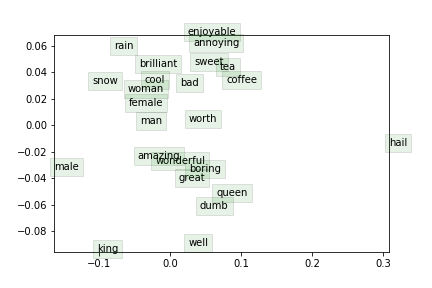

In [16]:
from IPython.display import Image
Image("word_vectors.png")